## import libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## plot logistic regression curve

In [2]:
path_to_dataset = 'data/diabetes_data.csv'
# load csv file to dataframe
dataframe = pd.read_csv(path_to_dataset)
# make a copy of dataset
df = dataframe.copy()
# change the column name of target variable
df.rename(columns = {'Diabetes_012': 'Diabetes'}, inplace=True)

<AxesSubplot: xlabel='GenHlth', ylabel='Diabetes'>

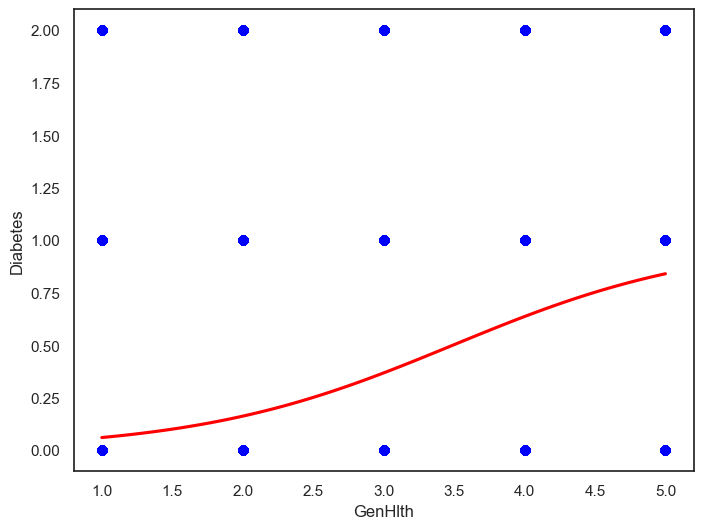

In [3]:
# plot logistic regression curve: GenHlth vs Diabetes
sns.set(rc = {'figure.figsize': (8, 6)})
sns.set(style='white')
sns.regplot(x=df['GenHlth'], y=df['Diabetes'], data=df, 
            logistic=True, ci=None, 
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

## load dataset to train logistic model

In [2]:
# load random undersampling data
X_rus_train = pd.read_csv('data/rus/X_rus_train.csv')
X_rus_test = pd.read_csv('data/rus/X_rus_test.csv')

y_rus_train = pd.read_csv('data/rus/y_rus_train.csv')
y_rus_test = pd.read_csv('data/rus/y_rus_test.csv')

# load random oversampling data
X_ros_train = pd.read_csv('data/ros/X_ros_train.csv')
X_ros_test = pd.read_csv('data/ros/X_ros_test.csv')

y_ros_train = pd.read_csv('data/ros/y_ros_train.csv')
y_ros_test = pd.read_csv('data/ros/y_ros_test.csv')

# load preprocessed original data
X_org_train = pd.read_csv('data/org/X_org_train.csv')
X_org_test = pd.read_csv('data/org/X_org_test.csv')

y_org_train = pd.read_csv('data/org/y_org_train.csv')
y_org_test = pd.read_csv('data/org/y_org_test.csv')


In [3]:
print(f'{y_rus_test.shape=}, {y_rus_train.shape=}')

y_rus_test.shape=(23987, 1), y_rus_train.shape=(55967, 1)


## logistic regression model


Higher values of C will instruct our model to fit the training set as best as possible, while lower C values will favour a simple models with coefficients closer to zero. Smaller values specify stronger regularization. 

In [4]:
### logistic regresssion model hyperparameters ###
C = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,  0.2, 0.5, 1, 2, 5, 10, 15]
SOLVER = ['newton-cg', 'newton-cholesky', 'sag', 'saga']
penalty = 'l2'
max_iter = 100

### logistic regression on random undersampling

In [5]:
# dictionary to save each model hyperparameters along with accuracy
dic_model_logReg_rus = dict() 

# keep track of the highest accuracy
best_acc = 0 
# keep track of the model with highest accuracy
best_model = 1 
# the key for dictionary
model_number = 1

for c in C:
    for solver in SOLVER:
        model_log_reg = LogisticRegression(
        multi_class='ovr', C=c, solver=solver, 
        penalty=penalty, max_iter=max_iter, random_state=7)

        model_log_reg.fit(X_rus_train, y_rus_train.values)
        y_pred = model_log_reg.predict(X_rus_test)
        accuracy = accuracy_score(y_true=y_rus_test, y_pred=y_pred)

        dic_model_logReg_rus[model_number] = [accuracy, c, solver]

        if accuracy > best_acc:
            best_acc = accuracy
            best_model = model_number
        
        model_number += 1

In [7]:
print(f'logistic regression with random undersampling {best_acc = }')
print(f'logistic regression with random undersampling {best_model = }')
print('logistic regression with random undersampling best model hyperparameters',  
      dic_model_logReg_rus[best_model])

logistic regression with random undersampling best_acc = 0.7423604452411723
logistic regression with random undersampling best_model = 33
logistic regression with random undersampling best model hyperparameters [0.7423604452411723, 2, 'newton-cg']


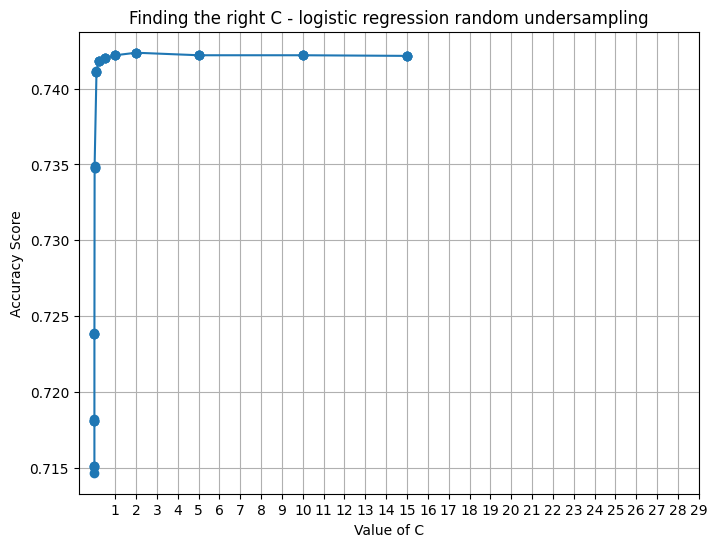

In [8]:
# plot each model's accuracy
ACC = []
C = []
for model in dic_model_logReg_rus.keys():
    ACC.append(dic_model_logReg_rus[model][0])
    C.append(dic_model_logReg_rus[model][1])

plt.figure(figsize=(8, 6))
plt.plot(C,ACC, marker = "o")
plt.xlabel("Value of C")
plt.ylabel("Accuracy Score")
plt.title("Finding the right C - logistic regression random undersampling")
plt.xticks(range(1, 30))
plt.grid()

### logistic regression on random oversampling

In [9]:
# dictionary to save each model hyperparameters along with accuracy
dic_model_logReg_ros = dict() 

# keep track of the highest accuracy
best_acc = 0 
# keep track of the model with highest accuracy
best_model = 1 

# the key for dictionary
model_number = 1

for c in C:
    for solver in SOLVER:
        model_log_reg = LogisticRegression(
        multi_class='ovr', C=c, solver=solver, 
        penalty=penalty, max_iter=max_iter, random_state=7)

        model_log_reg.fit(X_ros_train, y_ros_train.values)
        y_pred = model_log_reg.predict(X_ros_test)
        accuracy = accuracy_score(y_true=y_ros_test, y_pred=y_pred)

        dic_model_logReg_ros[model_number] = [accuracy, c, solver]

        if accuracy > best_acc:
            best_acc = accuracy
            best_model = model_number
        
        model_number += 1

In [10]:
print(f'logistic regression with random oversampling {best_acc = }')
print(f'logistic regression with random oversampling {best_model = }')
print('logistic regression with random oversampling best model hyperparameters',  
      dic_model_logReg_ros[best_model])

logistic regression with random oversampling best_acc = 0.7443496435869039
logistic regression with random oversampling best_model = 148
logistic regression with random oversampling best model hyperparameters [0.7443496435869039, 5, 'saga']


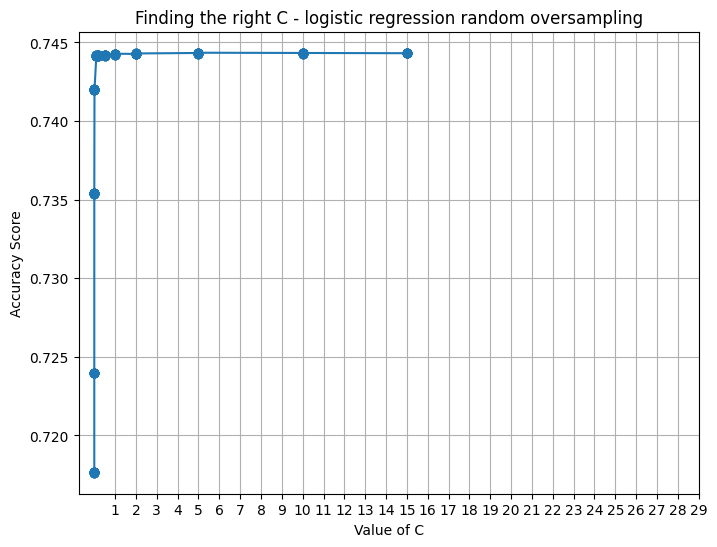

In [11]:
# plot each model's accuracy
ACC = []
C = []
for model in dic_model_logReg_ros.keys():
    ACC.append(dic_model_logReg_ros[model][0])
    C.append(dic_model_logReg_ros[model][1])

plt.figure(figsize=(8, 6))
plt.plot(C,ACC, marker = "o")
plt.xlabel("Value of C")
plt.ylabel("Accuracy Score")
plt.title("Finding the right C - logistic regression random oversampling")
plt.xticks(range(1, 30))
plt.grid()

### logistic regression on original data with class weight

In [25]:
# dictionary to save each model hyperparameters along with accuracy
dic_model_logReg_org = dict() 

# keep track of the highest accuracy
best_acc = 0 
# keep track of the model with highest accuracy
best_model = 1 

# the key for dictionary
model_number = 1

for c in C:
    for solver in SOLVER:
        model_log_reg = LogisticRegression(
        multi_class='ovr', C=c, solver=solver, 
        penalty=penalty, max_iter=max_iter, random_state=7, class_weight='balanced')

        model_log_reg.fit(X_org_train, y_org_train)
        y_pred = model_log_reg.predict(X_org_test)
        accuracy = accuracy_score(y_true=y_org_test, y_pred=y_pred)

        dic_model_logReg_org[model_number] = [accuracy, c, solver]

        if accuracy > best_acc:
            best_acc = accuracy
            best_model = model_number
        
        model_number += 1

In [26]:
print(best_acc)
print(best_model)
print(dic_model_logReg_org[best_model])

0.729751392830863
260
[0.729751392830863, 0.1, 'saga']


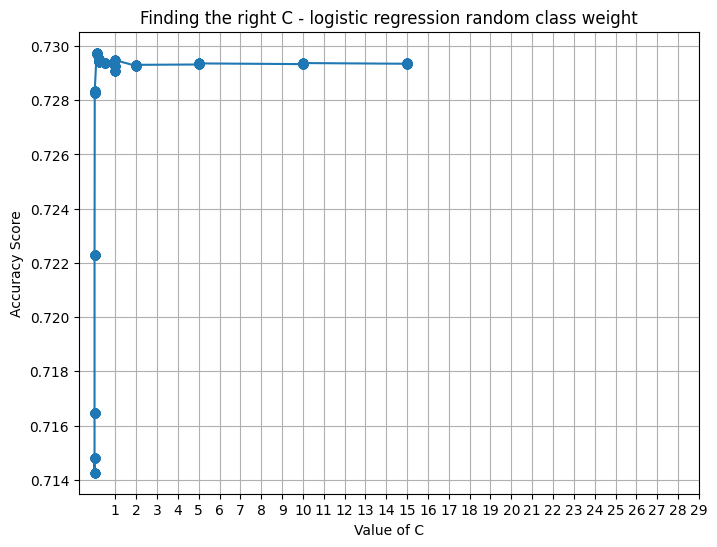

In [28]:
# plot each model's accuracy
ACC = []
C = []
for model in dic_model_logReg_org.keys():
    ACC.append(dic_model_logReg_org[model][0])
    C.append(dic_model_logReg_org[model][1])

plt.figure(figsize=(8, 6))
plt.plot(C, ACC, marker = "o")
plt.xlabel("Value of C")
plt.ylabel("Accuracy Score")
plt.title("Finding the right C - logistic regression random class weight")
plt.xticks(range(1, 30))
plt.grid()

## save models performance report

In [29]:
df_rus_model = pd.DataFrame(dic_model_logReg_rus)
df_ros_model = pd.DataFrame(dic_model_logReg_ros)
df_org_model = pd.DataFrame(dic_model_logReg_org)

df_rus_model.to_csv('findings/logistic_regression/df_rus_model.csv', index=False)
df_ros_model.to_csv('findings/logistic_regression/df_ros_model.csv', index=False)
df_org_model.to_csv('findings/logistic_regression/df_org_model.csv', index=False)